In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
data={
    "area":[800,900,1000,1100,1200,1300,1400,1500,1600,1200],
    "bedrooms":[1,2,2,2,3,3,3,4,4,4],
    "bathrooms":[1,1,2,2,2,2,3,3,3,3],
    "age":[12,15,10,8,6,5,4,3,2,1],
    "dis_city":[15,14,13,12,10,9,8,7,6,5],
    "price":[40,50,55,60,70,75,80,90,95,100]
}
df=pd.DataFrame(data)
df

,area,bedrooms,bathrooms,age,dis_city,price
0,800,1,1,12,15,40
1,900,2,1,15,14,50
2,1000,2,2,10,13,55
3,1100,2,2,8,12,60
4,1200,3,2,6,10,70
5,1300,3,2,5,9,75
6,1400,3,3,4,8,80
7,1500,4,3,3,7,90
8,1600,4,3,2,6,95
9,1200,4,3,1,5,100


In [5]:
x=df.drop("price",axis=1)           #multiple columns
y=df["price"]

In [7]:
x

,area,bedrooms,bathrooms,age,dis_city
0,800,1,1,12,15
1,900,2,1,15,14
2,1000,2,2,10,13
3,1100,2,2,8,12
4,1200,3,2,6,10
5,1300,3,2,5,9
6,1400,3,3,4,8
7,1500,4,3,3,7
8,1600,4,3,2,6
9,1200,4,3,1,5


In [9]:
y

0     40
1     50
2     55
3     60
4     70
5     75
6     80
7     90
8     95
9    100
Name: price, dtype: int64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [13]:
scaler=StandardScaler()
xtrained=scaler.fit_transform(x_train)
xtest=scaler.transform(x_test)

# Linear Regression

In [16]:
linear=LinearRegression()
linear.fit(xtrained,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [18]:
ytrain_pre=linear.predict(xtrained)
ytest_pre=linear.predict(xtest)

In [20]:
ytrain_pre

array([74.41860465, 40.04472272, 89.32915921, 54.95527728, 99.82110912,
       71.43112701, 59.10554562, 80.89445438])

In [22]:
ytest_pre

array([92.31663685, 43.82826476])

In [24]:
train_mse_lin=mean_squared_error(y_train,ytrain_pre)
test_mse_lin=mean_squared_error(y_test,ytest_pre)
print("train mse",train_mse_lin)
print("test mse",test_mse_lin)

train mse 0.5590339892665479
test mse 22.645376838912064


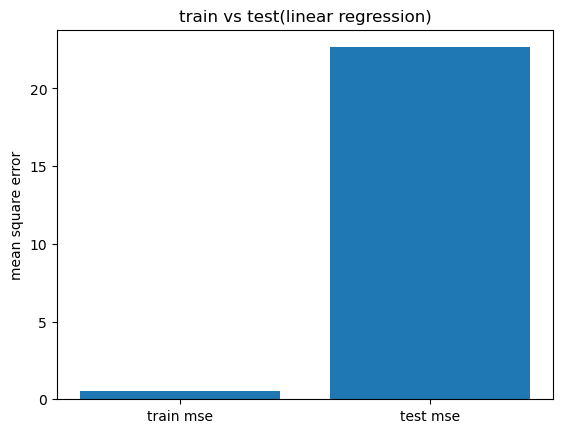

In [26]:
plt.bar(["train mse","test mse"],[train_mse_lin,test_mse_lin])
plt.ylabel("mean square error")
plt.title("train vs test(linear regression)")
plt.show()

# Ridge Regression

In [29]:
ridge=Ridge(alpha=2.0)
ridge.fit(xtrained,y_train)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",2.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [31]:
ytrain_pr=ridge.predict(xtrained)
ytest_pr=ridge.predict(xtest)

In [33]:
ytrain_pr

array([74.4829139 , 40.71605035, 89.82873267, 56.06186912, 94.88123865,
       71.27015235, 60.63115226, 82.1278907 ])

In [35]:
ytest_pr

array([93.04149422, 42.99080594])

In [37]:
trains_mse_rid=mean_squared_error(y_train,ytrain_pr)
tests_mse_rid=mean_squared_error(y_test,ytest_pr)
print("train mse",trains_mse_rid)
print("test mse",tests_mse_rid)

train mse 4.33478518345601
test mse 26.482273145731522


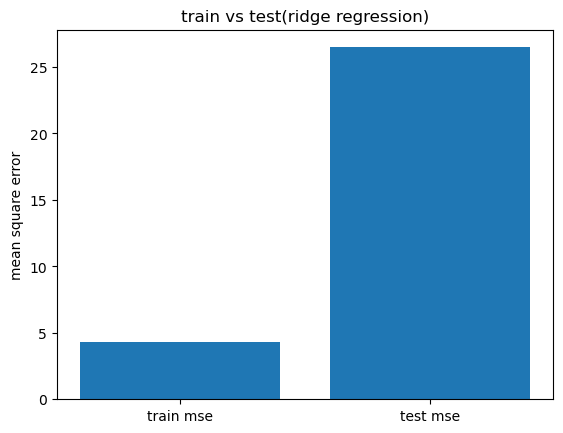

In [39]:
plt.bar(["train mse","test mse"],[trains_mse_rid,tests_mse_rid])
plt.ylabel("mean square error")
plt.title("train vs test(ridge regression)")
plt.show()

# Lasso Regression

In [42]:
lasso=Lasso(alpha=2.0)
lasso.fit(xtrained,y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",2.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [44]:
ytrain_p=lasso.predict(xtrained)
ytest_p=lasso.predict(xtest)

In [46]:
ytrain_p

array([75.61147454, 44.00508263, 87.28040888, 55.67401697, 95.88847499,
       71.30744149, 59.97805003, 80.25505047])

In [48]:
ytest_p

array([91.58444193, 51.03044104])

In [50]:
trainss_mse_las=mean_squared_error(y_train,ytrain_p)
testss_mse_las=mean_squared_error(y_test,ytest_p)
print("train mse",trainss_mse_las)
print("test mse",testss_mse_las)

train mse 5.368079558635938
test mse 6.363922819647273


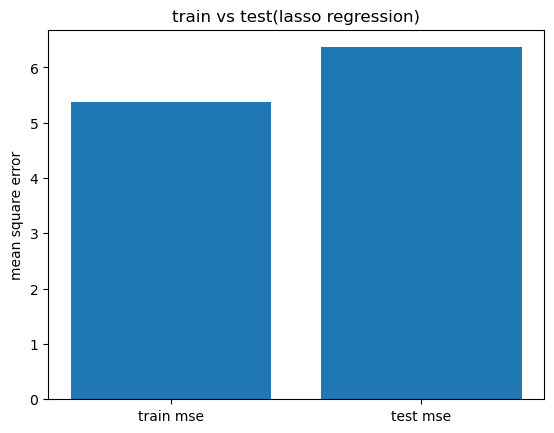

In [52]:
plt.bar(["train mse","test mse"],[trainss_mse_las,testss_mse_las])
plt.ylabel("mean square error")
plt.title("train vs test(lasso regression)")
plt.show()